In [11]:
import numpy as np
import pandas as pd

## Correlation Matrix

- COV Matrix ?
- Spark / Dask ? (custom with numpy) ?
- Numpy / Pandas ?

## Benchmark Numpy `.corrcoef()`

In [14]:
N = [ (1+i) * 500 for i in range(20) ]

In [15]:
import time

np_durations = []

for n in N:
    R = np.random.random( (n,n) ) 

    start = time.time()
    
    corr = np.corrcoef(R)
    
    end = time.time()
    
    elapsed_time = end-start
    np_durations.append( elapsed_time )

In [16]:
import time

pd_durations = []

for n in N:
    R = np.random.random( (n,n) )
    df_R = pd.DataFrame(R.T)
    start = time.time()
    corr = df_R.corr()
    end = time.time()
    
    elapsed_time = end-start
    pd_durations.append( elapsed_time )

# Spark SparkML `pyspark.mllib.stat`


The code block was used on a Spark cluster with
```
4 Executors: 2 vCPU and 8 GB RAM, Driver: 2 vCPU and 8 GB RAM
```

Benchmark code
```

N = [ (1+i) * 500 for i in range(20) ]


import time
from pyspark.mllib.stat import Statistics

import numpy as np

pyspark_ml_duration = []

for n in N:
    R = np.random.random( (n,n) )
    spark_R = sc.parallelize(R, 200)
    print(n)
    print(pyspark_ml_duration)
    

    start = time.time()
    
    corr = Statistics.corr(spark_R, method="pearson")
    
    end = time.time()
    
    print(n)
    print(pyspark_ml_duration)
    
    elapsed_time = end-start
    pyspark_ml_duration.append( elapsed_time )
    
    print(pyspark_ml_duration)
    print(N)
    time.sleep(5)
    spark.catalog.clearCache()
    time.sleep(5) 
```

## Spark failed with `spark.driver.maxResultSize` error

```
...
Py4JJavaError: An error occurred while calling o247.corr.
: org.apache.spark.SparkException: Job aborted due to stage failure: Total size of serialized results of 11 tasks (1054.4 MB) is bigger than spark.driver.maxResultSize (1024.0 MB)
...
```

# Spark SparkML `pyspark.ml.stat`


The code block was used on a Spark cluster with
```
4 Executors: 2 vCPU and 8 GB RAM, Driver: 2 vCPU and 8 GB RAM
```

Benchmark code
```
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import Correlation

pyspark_ml_duration = []

for n in N:
    
    print(n)
    R = np.random.random( (n,n) )
    data = [(Vectors.dense(r),) for r in R]

    df = spark.createDataFrame(data, ["features"])
    start = time.time()
    r1 = Correlation.corr(df, "features").head()
    end = time.time()
    
    elapsed_time = end - start
    print(elapsed_time)
    
    pyspark_ml_duration.append(elapsed_time)
    print(pyspark_ml_duration)
    print(N)
    time.sleep(5)
    spark.catalog.clearCache()
    time.sleep(5)
```

## Spark failed with `EOFError / Java` error

```
 File "/opt/ibm/spark/python/pyspark/serializers.py", line 692, in read_int
    raise EOFError
EOFError
```

In [59]:
np_durations = [0.39348578453063965, 0.08326125144958496, 0.15268945693969727, 0.28942322731018066, 0.6863870620727539, 0.9487566947937012, 1.7536392211914062, 2.1039817333221436, 2.488612651824951, 3.8385558128356934, 4.536183595657349, 7.043868541717529, 13.174131155014038, 9.414541006088257, 15.54681134223938, 17.859051942825317, 18.63855481147766, 25.086620092391968, 28.41591787338257, 27.02675151824951]

In [60]:
pd_durations = [0.4345703125, 1.729438304901123, 5.37430739402771, 13.710556745529175, 27.34226107597351, 44.230183839797974, 74.63836026191711, 108.33710813522339, 154.8328013420105, 196.69293236732483, 261.5457844734192, 340.25077724456787, 460.8296036720276, 541.9136180877686, 662.3438098430634, 810.1826422214508, 968.9293067455292, 1205.5199077129364, 1367.204432964325, 1593.68816781044]

In [61]:
pyspark_mllib_durations = [4.017786502838135, 6.230214595794678, 8.187354326248169, 12.400008201599121, 18.25882863998413, 25.145856380462646, 34.159401178359985, 46.934725761413574, 59.107686281204224, None, None, None,None, None,None, None,None, None,None, None,]

In [62]:
pyspark_ml_durations = [14.988073348999023, 2.8658831119537354, 3.687025308609009, 6.217652082443237, 8.658499956130981, 11.750478982925415, 15.198622226715088, 21.065590858459473, 28.652121543884277, 36.433266162872314, 45.58854794502258, 56.13194155693054, 73.02558398246765, 104.12837076187134] + [None] * 6

In [63]:
benchmarks = pd.DataFrame( {'numpy' : np_durations, 'pandas' : pd_durations, 'Spark .mllib' : pyspark_mllib_durations, 'Spark .ml': pyspark_ml_durations}, index=N)

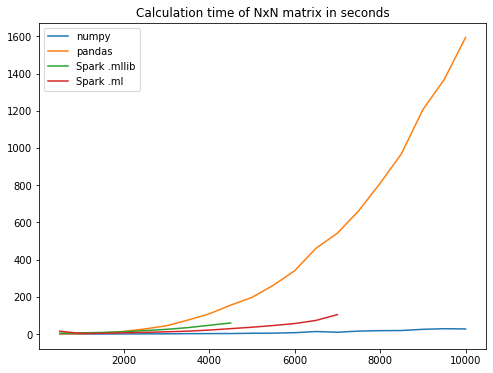

In [64]:
%matplotlib inline

benchmarks.plot(title="Calculation time of NxN matrix in seconds", figsize=(8,6))